# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports

In [7]:
import logging

import numpy as np
import pandas as pd

import core.plotting.misc_plotting as cplmiplo
import core.plotting.visual_stationarity_test as cpvistte

import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

# Configure Logger

In [8]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.4.3' != container_version='1.4.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask408_Unit_test_plot_time_series_by_period'
  hash='f18adfb30'
  # Last commits:
    * f18adfb30 GP Saggese Delete UMD_CS_Phonebook_Graduate_Students.csv                     (    2 days ago) Mon Jul 10 19:57:27 2023  (HEAD -> SorrTask408_Unit_test_plot_time_series_by_period, origin/SorrTask409_Unit_test_plot_timeseries_distribution, master)
    * c7cb051c1 Yiyun Lei SorrTask396 Download info for students (#400)                     (    2 days ago) Mon Jul 10 11:56:11 2023           
    * 20162d520 Yiyun Lei gitignore (#404)                                                 

# Plots

## `plot_histograms_and_lagged_scatterplot()`

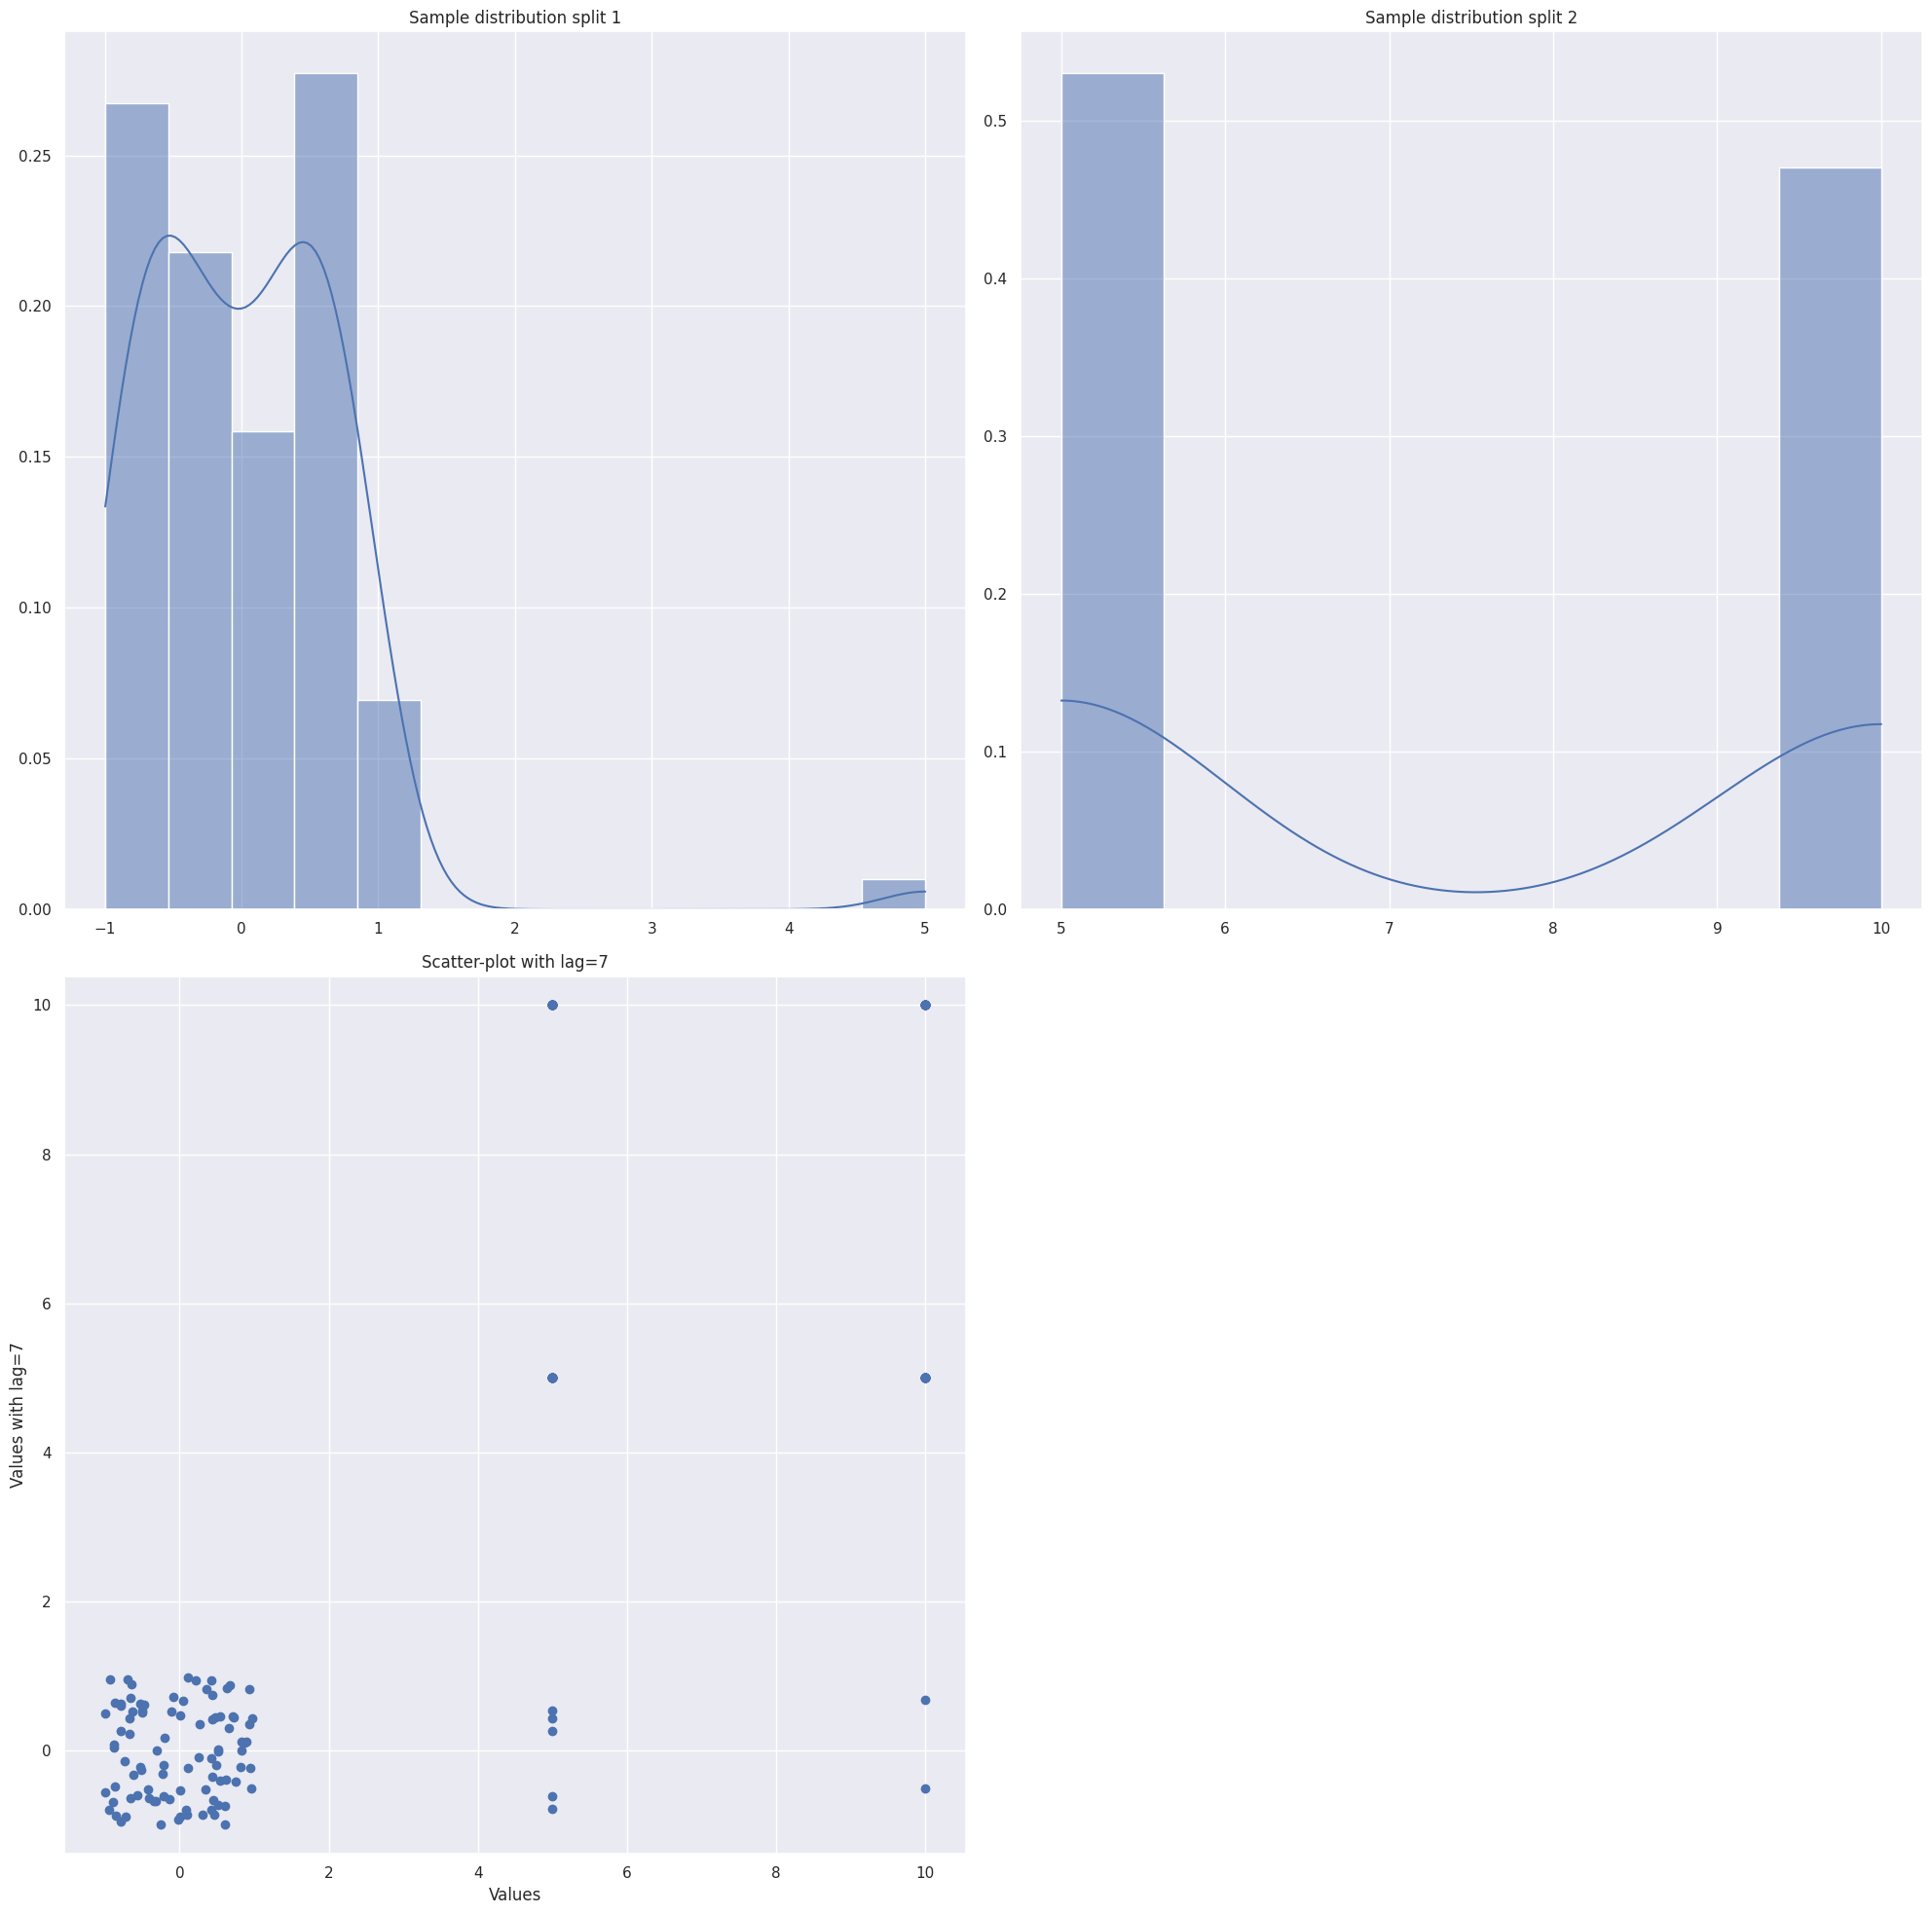

In [9]:
# Set inputs.
seq = np.concatenate([np.random.uniform(-1, 1, 100), np.random.choice([5, 10], 100)])
index = pd.date_range(start="2023-01-01", periods=len(seq), freq="D")
srs = pd.Series(seq, index=index)
lag = 7
# TODO(Dan): Remove after integration with `cmamp`
figsize = (20,20)
# Plot.
cpvistte.plot_histograms_and_lagged_scatterplot(srs, lag, figsize=figsize)

## `plot_time_series_by_period()`

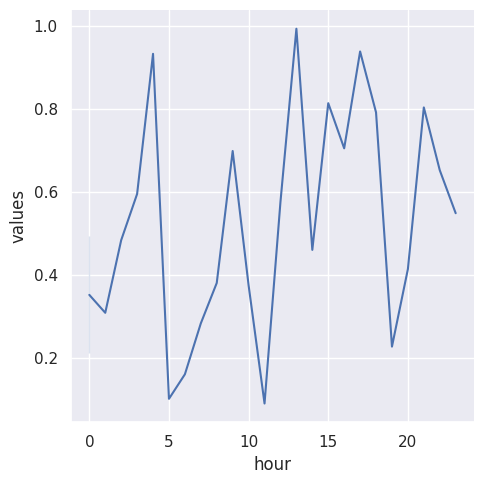

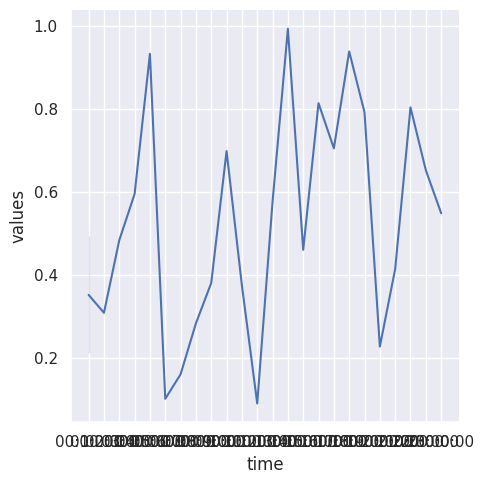

In [10]:
timestamps = pd.date_range(start="2023-07-01", end="2023-07-02", freq="H")
values = np.random.rand(len(timestamps))
test_series = pd.Series(values, index=timestamps)

# Test for "hour" period
cplmiplo.plot_time_series_by_period(test_series, "hour")
# plt.title("Hourly Aggregation")
# plt.show()

# Test for "time" period
cplmiplo.plot_time_series_by_period(test_series, "time")
# plt.title("Time Aggregation")
# plt.show()